In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use("bmh")

# Solución numérica de la ecuación 

Tenemos la ecuación de orden 8 para $R$ dada por:

$$R^8 - 8b^3R^5 -2b^4R^4-8b^7R+b^8 = 0.$$

Para estimar sus soluciones, usaremos el método numérico de búsqueda de ceros de *Newton-Raphson*. Dicho método consiste en aplicar la siguiente iteración:

$$x_{n+1} = x_n + \frac{f(x_n)}{f^{\prime}(x_n)}.$$

La iteración se aplica repetidas veces, hasta que la diferencia entre el valor *inicial* o *semilla* $x_n$ y el valor de estimación $x_{n+1}$ sea los suficientemente pequeña.

In [3]:
# Método de Newton-Raphson.
def Newton(f, df, x0, eps=1e-3, nmax=30): #eps es la tolerancia del método y x0 el valor inicial.
    n =0 
    while np.abs(f(x0)/df(x0)) > eps and np.abs(f(x0)) > eps:  #Aplicación de la iteración.
        x0 = x0 - f(x0) / df(x0)
        n += 1 #Contabiliza cuantas iteraciones se realizaron.
    return x0,n

b=5
f = lambda R: R**8 -8*b**3*R**5 -2*b**4*R**4 -8*b**7*R + b**8 
df = lambda R: 8*R**7 - 40*b**3*R**4 + 8*b**4*R**3 - 8*b**7

aprox_1 = Newton(f, df, 1) #Valor semilla x0=1
aprox_2 = Newton(f,df, 10) #Valor semilla x0=10
print("El valor estimado de R para b=5 es", aprox_1[0])
print("El siguiente valor de R que es solución para b=5 es", aprox_2[0], "En este caso la esfera contendría a la carga, por lo que se descarta la opción")

El valor estimado de R para b=5 es 0.624555894262136
El siguiente valor de R que es solución para b=5 es 10.527381579622178 En este caso la esfera contendría a la carga, por lo que se descarta la opción


# Gráfica del campo eléctrico

El campo eléctrico generado por el sistema completo, para el plano $z=0$, viene dado por:

$$ \vec{E}(\vec{x}) = \frac{q}{4 \pi \epsilon_0 } \left( \frac{x\hat{x}+(y-b)\hat{y}}{  \left( x^2+ (y-b)^2 \right)^{3/2}} + \frac{x\hat{x}+(y+b)\hat{y}}{\left( x^2+ (y+b)^2 \right)^{3/2}} - \frac{R}{b}\cdot \frac{x\hat{x}+y\hat{y}}{\left( x^2+ y^2 \right)^{3/2}}  \right) $$

En el gŕafico se consideró la distancia b = 5 [cm], la carga $q=1$[C] y el radio de la esféra de $R=0.624[cm]$. Además, suponemos que trabajamos con las distancias $x,y$ medidas en centímetros. De esta forma, el Campo Eléctrico resulta con unidad de medida en  Voltios por centímetro [V/cm]. Cabe destacar que las bolas rojas presentes en el gráfico del campo eléctrico representan las cargas puntuales.

In [4]:
#Definimos la malla a usar
n = 30 # nodos de la grilla
max = 7# máximo y mínimo del gráfico
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
x,y = np.meshgrid(X,Y)

In [5]:
R = aprox_1[0] #Radio estimado
e_0 = 8.85*10**(-12) #Epsilon.
k = 1/(4*np.pi*e_0) # Constante eléctrica.

# Definimos la componente del Campo Eléctrico en x
def Ex(x,y,b=5,Q=1,R=R):
    r1 = (x**2 + (y-b)**2)**1.5
    r2 = (x**2 + (y+b)**2)**1.5
    r3 = R/b * (x**2 + y**2)**1.5
    return k*Q*x*(1/r1 + 1/r2 - 1/r3)

# Definimos la componente del Campo Eléctrico en y
def Ey(x,y,b=5,Q=1,R=R):
    h1 = (y-b)
    h2 = (y+b)
    r1 = (x**2 + h1**2)**1.5
    r2 = (x**2 + h2**2)**1.5
    r3 =  R/b *(x**2 + y**2)**1.5
    return k*Q*(h1/r1 + h2/r2 - y/r3)

# Definimos la magnitud del Campo Eléctrico para posterior normalización.
def E(x,y):
    E = np.sqrt(Ex(x,y)**2 + Ey(x,y)**2) 
    return E

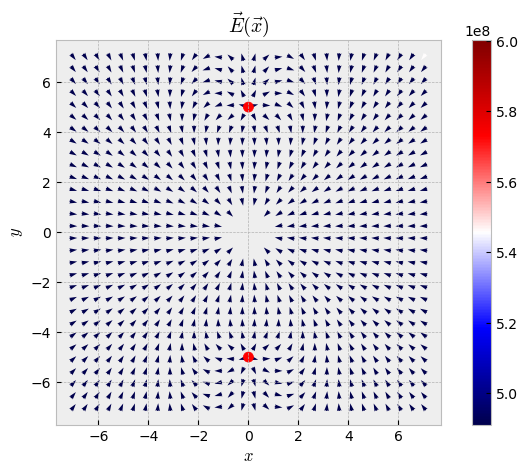

In [6]:
#Graficamos el Campo Eléctrico.
plt.figure(figsize=(8,5))
for i in range(n): #Realizamos dos iteraciones para considerar todos los puntos (x_i, y_j) de la grilla.
    for j in range(n):
        a,b = x[i][j], y[i][j] # Dado que x,y son matrices, trabajamos con x[i][j] es decir el elemento a_ij de la matriz x para establecer una condición posteriormente. 
        if a**2 + b**2 >= R: #Establecemos los valores permitidos del Campo Eléctrico (Fuera de la esféra) con un condicional.
            plt.quiver(a,b,Ex(a,b)/E(a,b),Ey(a,b)/E(a,b), E(a,b), cmap="seismic", color='blue', scale=50, pivot='middle')
            plt.xlim(-1.1*max,1.1*max)
            plt.ylim(-1.1*max,1.1*max)
            plt.xlabel('$x$')
            plt.ylabel('$y$')
            plt.title('$\\vec{E}(\\vec{x})$')  
plt.colorbar() # Agregamos barra lateral
#Agregamos los circulos que representarán las cargas q
circle1 = plt.Circle((0, 5), radius=0.2, color='red', fill=True)
circle2 = plt.Circle((0, -5), radius=0.2, color='red', fill=True)

# Dado que el circulo es un parche para matplorlib, no se puede obtenr directamente. Por ello, obtenemos el eje actual y añadir el círculo
ax = plt.gca() #Esta función nos permite obtener el eje actual (gráfico realizado anteriormente)
# Agregamos los circulos
ax.add_patch(circle1)
ax.add_patch(circle2)
#Ajustamos límites del gráfico
plt.gca().set_aspect('equal', adjustable='box')
ax.set_ylim(-max*1.1,max*1.1)
ax.set_xlim(-max*1.1,max*1.1)
plt.savefig("Campo_electrico_malla_2.pdf")
plt.show()